# Clustering of the Adsorbates

In this notebook, the adsorbates extracted from RING are clustered based on the number of each group category (G, T, B, H) they have. The group category is defined as G, T, B, and H for the group additivity components with 0, 1, 2, and 3 free valencies, respectively. For clustering, K-means clustering (K=3) with summation of each group category (T,B,H) is used.

## Data Loading

In [1]:
# import modules and the data set files
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('3115_Acyclic_SMILES_Group_Additivity.csv')

In [2]:
df.head()

,SMILES,G01,G02,G03,G04,T01,T02,T03,B01,B02,H01
0,C([Pt])C,1,0,0,0,1,0,0,0,0,0
1,C([Pt])([Pt])C,1,0,0,0,0,0,0,1,0,0
2,C(C[Pt])[Pt],0,0,0,0,2,0,0,0,0,0
3,C([Pt])([Pt])([Pt])C,1,0,0,0,0,0,0,0,0,1
4,C(C[Pt])([Pt])[Pt],0,0,0,0,1,0,0,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3115 entries, 0 to 3114
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   SMILES  3115 non-null   object
 1   G01     3115 non-null   int64 
 2   G02     3115 non-null   int64 
 3   G03     3115 non-null   int64 
 4   G04     3115 non-null   int64 
 5   T01     3115 non-null   int64 
 6   T02     3115 non-null   int64 
 7   T03     3115 non-null   int64 
 8   B01     3115 non-null   int64 
 9   B02     3115 non-null   int64 
 10  H01     3115 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 267.8+ KB


## Feature Engineering

In [4]:
# add columns for each subclass (G, T, B, H) and the number of carbons
df_clean = df.copy()
df_clean['G_sum'] = df_clean['G01'] + df_clean['G02'] + df_clean['G03'] + df_clean['G04']
df_clean['T_sum'] = df_clean['T01'] + df_clean['T02'] + df_clean['T03']
df_clean['B_sum'] = df_clean['B01'] + df_clean['B02']
df_clean['H_sum'] = df_clean['H01']
df_clean['C_num'] = (df_clean['G01'] + df_clean['G02'] + df_clean['G03'] + df_clean['G04'] +
                        df_clean['T01'] + df_clean['T02'] + df_clean['T03'] +
                        df_clean['B01'] + df_clean['B02'] + df_clean['H01'])

In [5]:
# add columns for ratio of each subclass
df_clean['G_ratio'] = df_clean['G_sum'] / df_clean['C_num']
df_clean['T_ratio'] = df_clean['T_sum'] / df_clean['C_num']
df_clean['B_ratio'] = df_clean['B_sum'] / df_clean['C_num']
df_clean['H_ratio'] = df_clean['H_sum'] / df_clean['C_num']

In [6]:
# add columns for standard scaled ratio
from sklearn.preprocessing import StandardScaler

columns_to_scale = ['G_ratio', 'T_ratio', 'B_ratio', 'H_ratio']
scaler =StandardScaler()
df_scaled = scaler.fit_transform(df_clean[columns_to_scale])
df_scaled = pd.DataFrame(df_scaled, columns=[col + '_scaled' for col in columns_to_scale])
df_clean = pd.concat([df_clean, df_scaled], axis=1)

## Visualization

d:\anaconda3\envs\ml_model\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


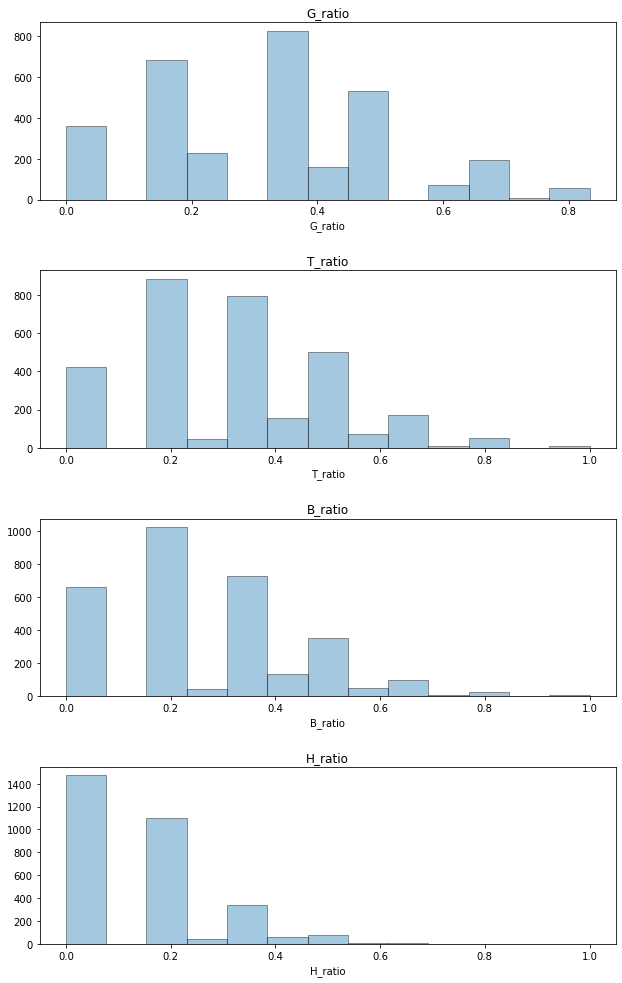

In [7]:
# subclass ratio
base_color = sns.color_palette()[0]
plt.figure(figsize=[10,16])

plt.subplot(4,1,1)
sns.distplot(df_clean['G_ratio'], hist=True, kde=False, bins=13, color=base_color,
             hist_kws={'edgecolor': 'black'})
plt.title('G_ratio')

plt.subplot(4,1,2)
sns.distplot(df_clean['T_ratio'], hist=True, kde=False, bins=13, color=base_color,
             hist_kws={'edgecolor': 'black'})
plt.title('T_ratio')

plt.subplot(4,1,3)
sns.distplot(df_clean['B_ratio'], hist=True, kde=False, bins=13, color=base_color,
             hist_kws={'edgecolor': 'black'})
plt.title('B_ratio')

plt.subplot(4,1,4)
sns.distplot(df_clean['H_ratio'], hist=True, kde=False, bins=13, color=base_color,
             hist_kws={'edgecolor': 'black'})
plt.title('H_ratio')

plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4);

In [8]:
# df_clean_log = df_clean.copy()
# cols_to_log =['G_ratio','T_ratio','B_ratio','H_ratio']

# for col in cols_to_log:
#     df_clean_log[col] = df_clean_log[col].replace(0, 0.001)
#     df_clean_log['log_'+col] = np.log(df_clean_log[col])

In [9]:
# plt.figure(figsize=[10,16])

# plt.subplot(4,1,1)
# sns.distplot(df_clean_log['log_G_ratio'], hist=True, kde=False, bins=13, color=base_color,
#              hist_kws={'edgecolor': 'black'})
# plt.title('G_ratio')

# plt.subplot(4,1,2)
# sns.distplot(df_clean_log['log_T_ratio'], hist=True, kde=False, bins=13, color=base_color,
#              hist_kws={'edgecolor': 'black'})
# plt.title('T_ratio')

# plt.subplot(4,1,3)
# sns.distplot(df_clean_log['log_B_ratio'], hist=True, kde=False, bins=13, color=base_color,
#              hist_kws={'edgecolor': 'black'})
# plt.title('B_ratio')

# plt.subplot(4,1,4)
# sns.distplot(df_clean_log['log_H_ratio'], hist=True, kde=False, bins=13, color=base_color,
#              hist_kws={'edgecolor': 'black'})
# plt.title('H_ratio')

# plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4);

## K-Means Clustering

We aim to cluster the species in a way that each class dominates the other two in a 3D plot of T, B, and H-class space.

In [10]:
from sklearn.cluster import KMeans

# k-means clustering
km = KMeans(n_clusters=3, random_state=192).fit(df_clean[['T_ratio', 'B_ratio', 'H_ratio']].values)
km_scaled = KMeans(n_clusters=3, random_state=192).fit(df_clean[['T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled']].values)

# save the cluster information to the dataframe
df_clean['km'] = km.labels_
df_clean['km_scaled'] = km_scaled.labels_

In [11]:
df_clean.groupby(['km'])[['G_ratio', 'T_ratio', 'B_ratio', 'H_ratio']].mean()

,G_ratio,T_ratio,B_ratio,H_ratio
km,,,,
0,0.289162,0.202816,0.438285,0.069737
1,0.266219,0.526053,0.137695,0.070033
2,0.410157,0.201556,0.133870,0.254417


In [12]:
df_clean.groupby(['km'])[['G_ratio_scaled', 'T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled']].mean()

,G_ratio_scaled,T_ratio_scaled,B_ratio_scaled,H_ratio_scaled
km,,,,
0,-0.147192,-0.519831,0.991552,-0.389599
1,-0.264457,1.097230,-0.593316,-0.387514
2,0.471215,-0.526133,-0.613483,0.910300


In [13]:
df_clean.groupby(['km_scaled'])[['G_ratio', 'T_ratio', 'B_ratio', 'H_ratio']].mean()

,G_ratio,T_ratio,B_ratio,H_ratio
km_scaled,,,,
0,0.304138,0.488751,0.133575,0.073535
1,0.345084,0.190145,0.145412,0.319359
2,0.315435,0.200853,0.421906,0.061806


In [14]:
df_clean.groupby(['km_scaled'])[['G_ratio_scaled', 'T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled']].mean()

,G_ratio_scaled,T_ratio_scaled,B_ratio_scaled,H_ratio_scaled
km_scaled,,,,
0,-0.070651,0.910621,-0.615037,-0.362864
1,0.138625,-0.583217,-0.552627,1.367401
2,-0.012915,-0.529649,0.905194,-0.445421


In [15]:
# change the cluster name to the name of the dominant group
df_clean['km'] = df_clean['km'].replace({0:'B', 1:'T', 2:'H'})
df_clean['km_scaled'] = df_clean['km_scaled'].replace({0:'T', 1:'H', 2:'B'})

In [16]:
df_clean['km'].value_counts(), df_clean['km_scaled'].value_counts()

(B    1178
 T    1005
 H     932
 Name: km, dtype: int64,
 B    1231
 T    1172
 H     712
 Name: km_scaled, dtype: int64)

In [17]:
# make an array for the distance of each point to its cluster centroid
km_dist = km.transform(df_clean[['T_ratio', 'B_ratio', 'H_ratio']].values).min(axis=1)
km_scaled_dist = km_scaled.transform(df_clean[['T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled']].values).min(axis=1)

# save them in the dataframe
df_clean['km_dist'] = km_dist
df_clean['km_scaled_dist'] = km_scaled_dist

In [18]:
(df_clean['km'] == df_clean['km_scaled']).mean()

0.8914927768860353

## Visualization

### 3D Plot


In [19]:
# function for a 3d plot
from matplotlib.colors import ListedColormap

def draw_3dplot_cluster(df, x, y, z, cluster):
    ''' Draw a scatter plot in 3D with clusters hued
    Args:
    df - pandas dataframe
    x,y,z - string. column name for x, y, z-axis
    cluster - string. column name containing cluster information

    Return:
    scatter plot
    '''
    
    fig = plt.figure(figsize=(10,10))
    ax = fig.gca(projection='3d')
    cmap = ListedColormap(sns.color_palette("husl", 3).as_hex())
    
    x_axis = df[x]
    y_axis = df[y]
    z_axis = df[z]
    
    sc = ax.scatter(x_axis, y_axis, z_axis, s=40, c=df[cluster].replace({'T':0, 'B':1, 'H':2}), cmap=cmap, marker='o', alpha=0.5)
    ax.set_xlabel('T-class')
    ax.set_ylabel('B-class')
    ax.set_zlabel('H-class')

    handles, labels = sc.legend_elements()
    plt.legend(handles, ['T','B','H'], bbox_to_anchor=(1.05,1), loc=2)
    plt.title("Clusters of 3115 acyclic hydrocarbon radicals")
    ax.view_init(30,30)

    plt.show()

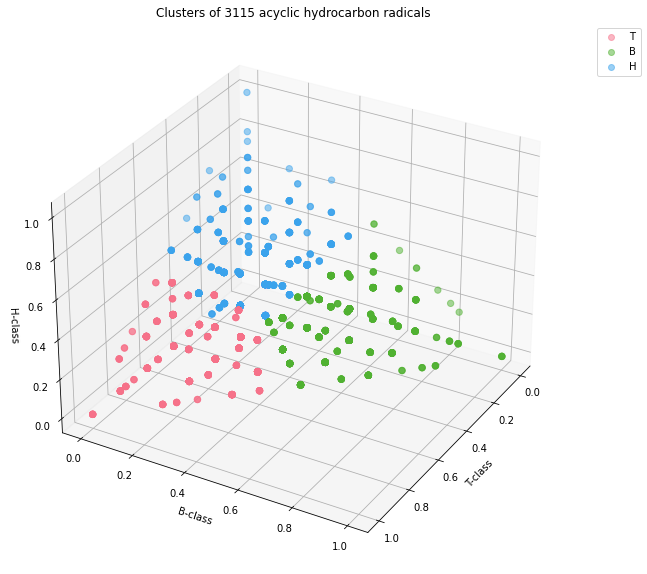

In [20]:
draw_3dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'H_ratio', 'km')

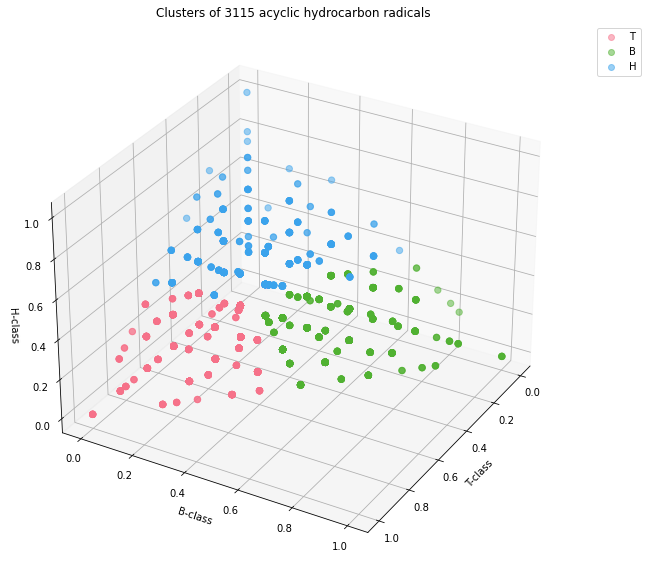

In [21]:
draw_3dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'H_ratio', 'km_scaled')

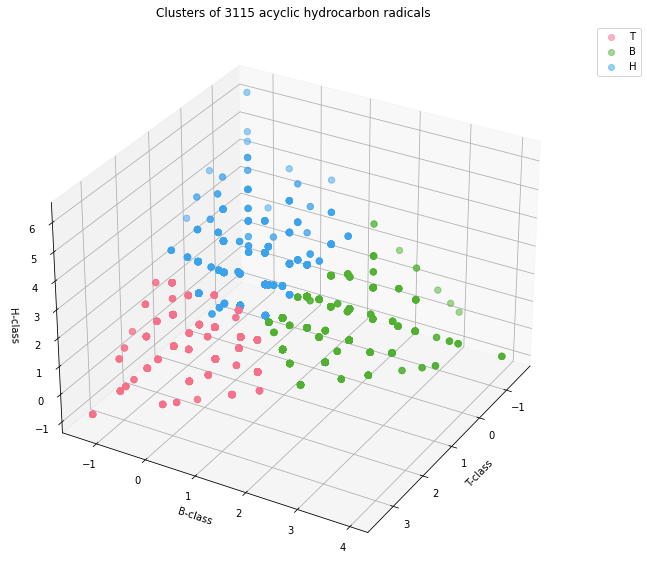

In [22]:
draw_3dplot_cluster(df_clean, 'T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled', 'km')

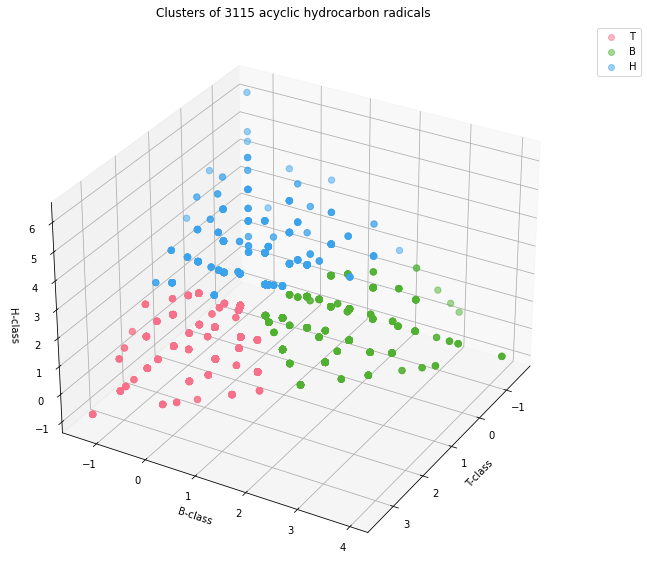

In [23]:
draw_3dplot_cluster(df_clean, 'T_ratio_scaled', 'B_ratio_scaled', 'H_ratio_scaled', 'km_scaled')

### 2D Plot

#### Raw version

In [24]:
# draw 2d plots
def draw_2dplot_cluster(df, x, y, hue, jitter=False):
    if jitter == True:
        sns.lmplot(x=x,y=y,data=df, fit_reg=False, scatter_kws={"s":50, "alpha":0.3}, x_jitter=0.05, y_jitter=0.05, hue=hue)
        plt.show()
    else:
        sns.lmplot(x=x,y=y,data=df, fit_reg=False, scatter_kws={"s":50, "alpha":0.3}, hue=hue)
        plt.show()

In [25]:
# draw 2d plots
def draw_2dplot_cluster_2(df, x, y, hue, style):
    sns.scatterplot(x=x,y=y,data=df, alpha=0.3, hue=hue, style=style)
    plt.show()

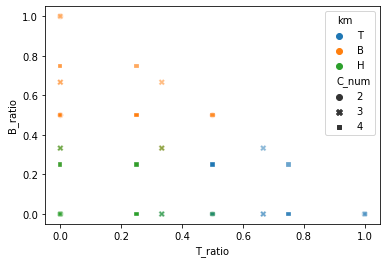

In [26]:
draw_2dplot_cluster_2(df_clean.query('C_num == 2 or C_num == 3 or C_num == 4'), 'T_ratio', 'B_ratio', 'km', 'C_num')

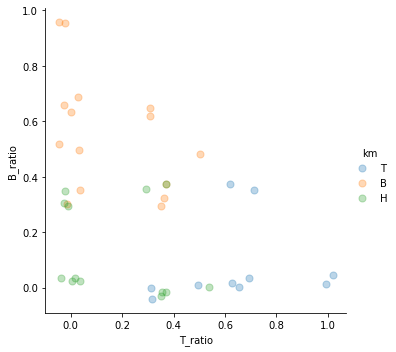

In [27]:
draw_2dplot_cluster(df_clean.query('C_num == 2 or C_num == 3'), 'T_ratio', 'B_ratio', 'km', jitter=True)

In [28]:
df_clean.query('C_num == 2 or C_num == 3 or C_num == 4')['km'].value_counts()

B    61
H    49
T    44
Name: km, dtype: int64

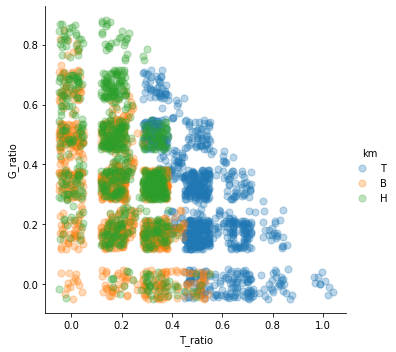

In [29]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'G_ratio', 'km', jitter=True)

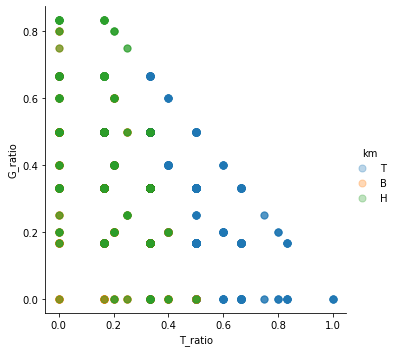

In [30]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'G_ratio', 'km', jitter=False)

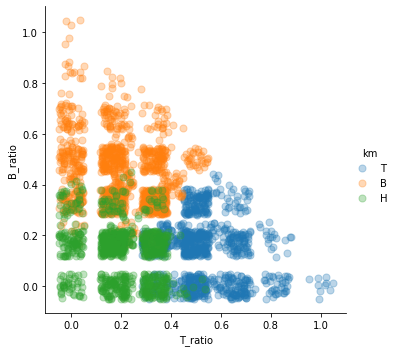

In [31]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'km', jitter=True)

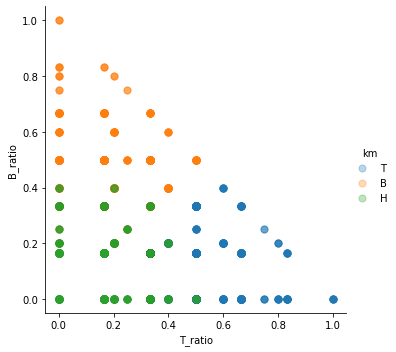

In [32]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'km', jitter=False)

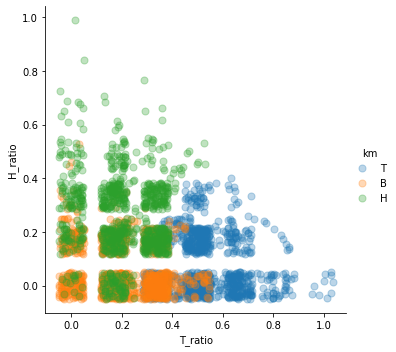

In [33]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'H_ratio', 'km', jitter=True)

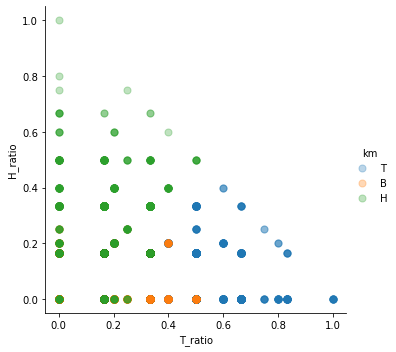

In [34]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'H_ratio', 'km', jitter=False)

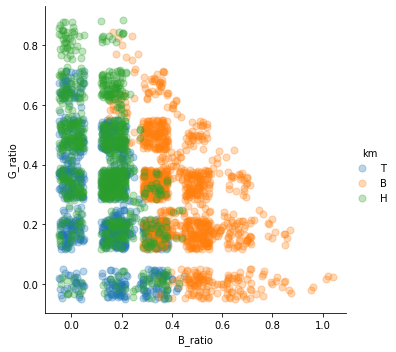

In [35]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'G_ratio', 'km', jitter=True)

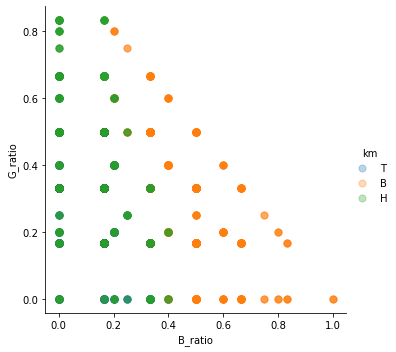

In [36]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'G_ratio', 'km', jitter=False)

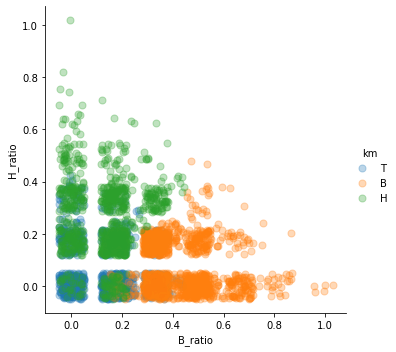

In [37]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'H_ratio', 'km', jitter=True)

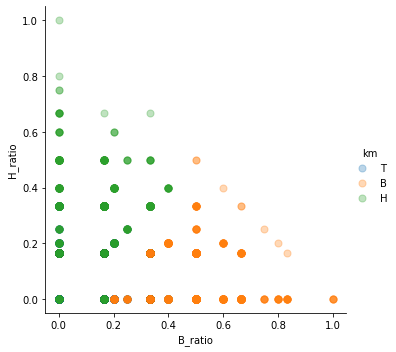

In [38]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'H_ratio', 'km', jitter=False)

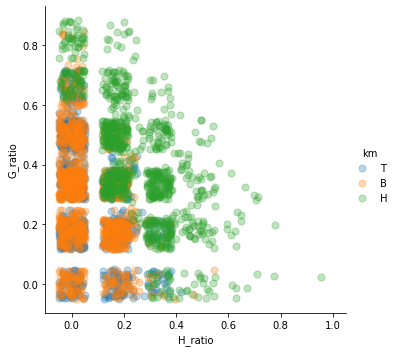

In [39]:
draw_2dplot_cluster(df_clean, 'H_ratio', 'G_ratio', 'km', jitter=True)

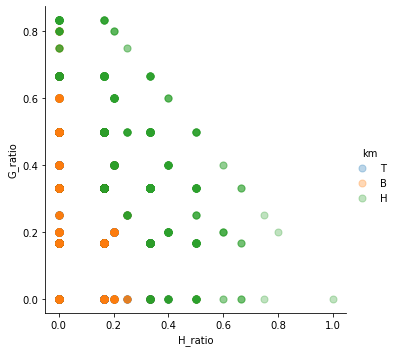

In [40]:
draw_2dplot_cluster(df_clean, 'H_ratio', 'G_ratio', 'km', jitter=False)

#### Scaled version

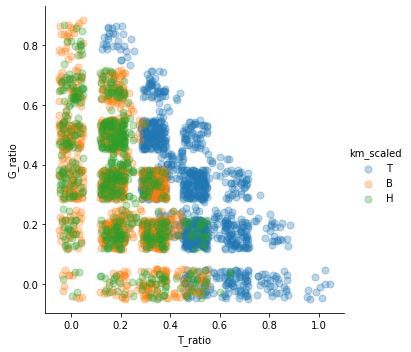

In [41]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'G_ratio', 'km_scaled', jitter=True)

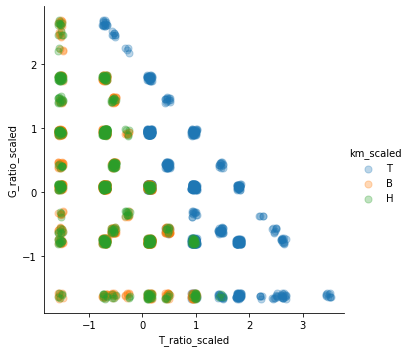

In [42]:
draw_2dplot_cluster(df_clean, 'T_ratio_scaled', 'G_ratio_scaled', 'km_scaled', jitter=True)

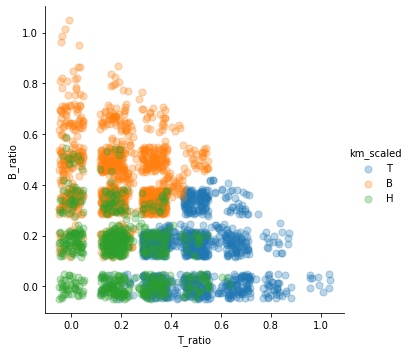

In [43]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'B_ratio', 'km_scaled', jitter=True)

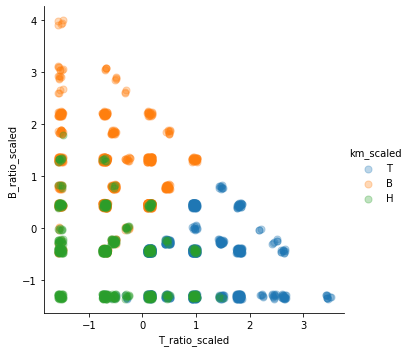

In [44]:
draw_2dplot_cluster(df_clean, 'T_ratio_scaled', 'B_ratio_scaled', 'km_scaled', jitter=True)

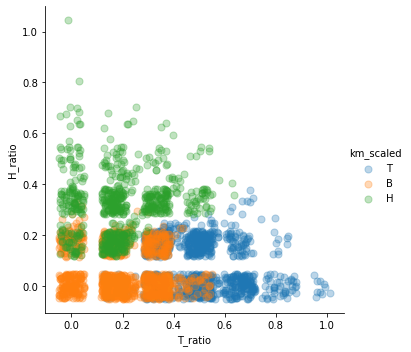

In [45]:
draw_2dplot_cluster(df_clean, 'T_ratio', 'H_ratio', 'km_scaled', jitter=True)

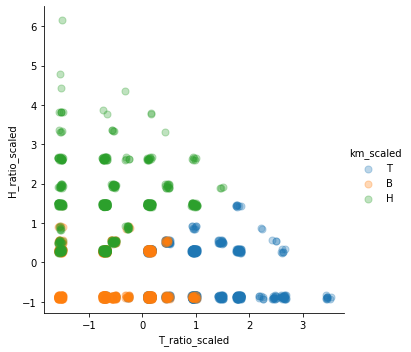

In [46]:
draw_2dplot_cluster(df_clean, 'T_ratio_scaled', 'H_ratio_scaled', 'km_scaled', jitter=True)

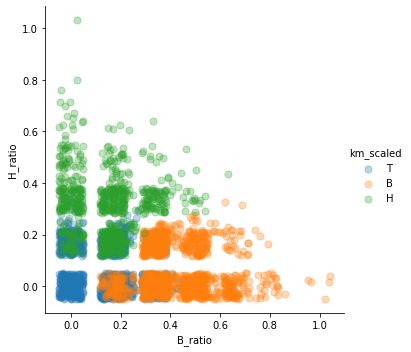

In [47]:
draw_2dplot_cluster(df_clean, 'B_ratio', 'H_ratio', 'km_scaled', jitter=True)

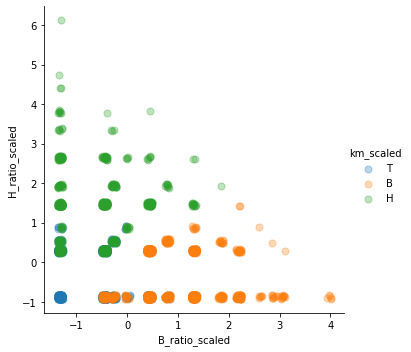

In [48]:
draw_2dplot_cluster(df_clean, 'B_ratio_scaled', 'H_ratio_scaled', 'km_scaled', jitter=True)

In [49]:
# export df_clean to a csv file
df_clean.to_csv('3115_species_km.csv')